D:\课题组\OneDrive\课题组\NIR\opv\PP\IT4F\20220421-50uw-magic\220430_210012_averaged.dat


<IPython.core.display.Javascript object>


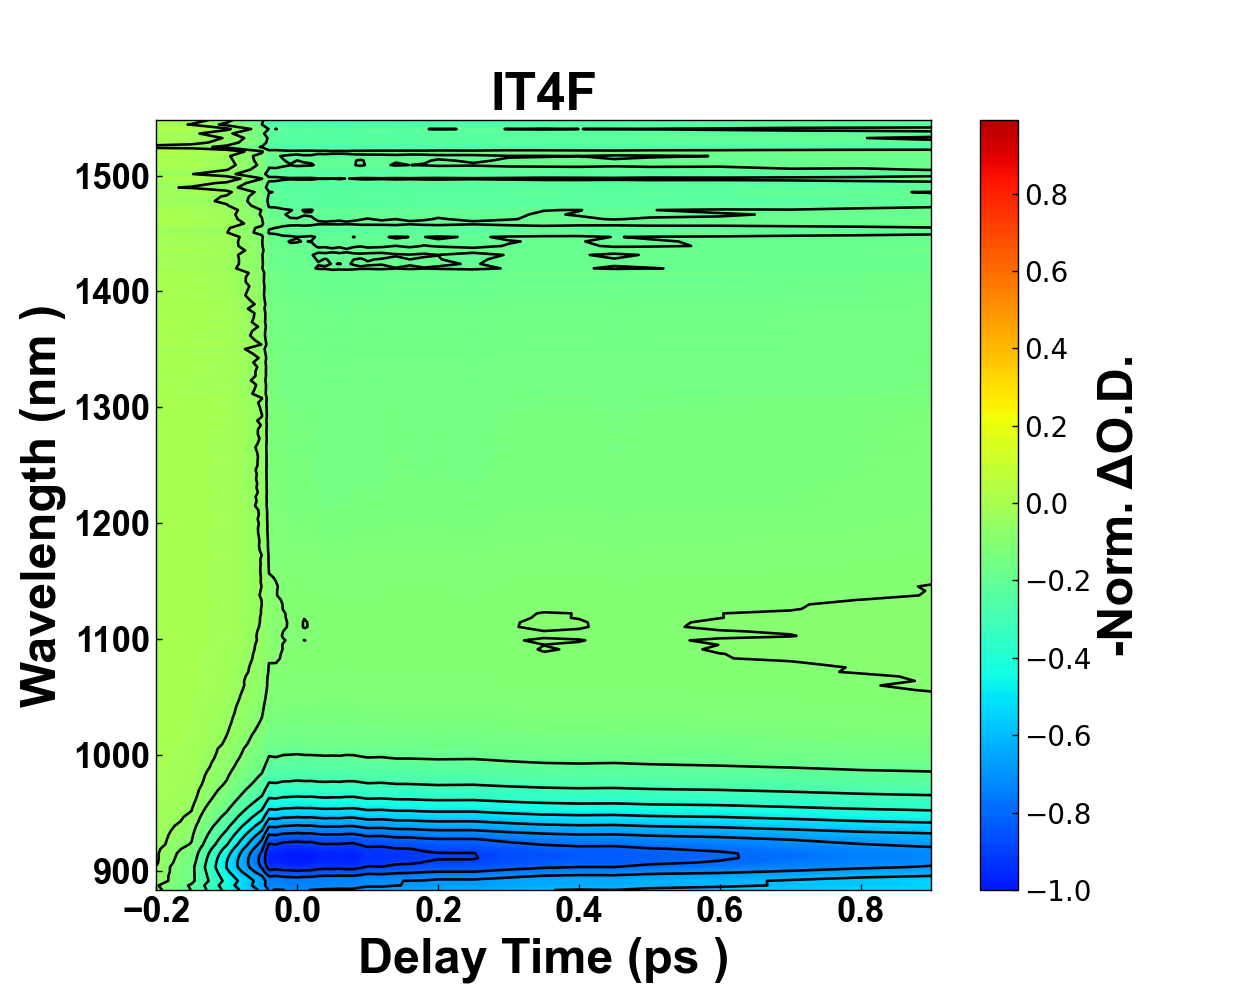

end


In [1]:
# drawing utils
%matplotlib notebook
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker, colors
from matplotlib import animation
# from matplotlib.colors import hsv_to_rgb
#matplotlib.rcParams['text.usetex'] = True

plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

from cycler import cycler

import os
import re


# math utils
import numpy as np

# statistics utils
import pandas as pd 

# Normalization 2D Data
def get_index(array, number):
    for i in range(len(array)):
        array[i] = abs(array[i]- number)
    print(array)
    min_index = np.argmin(array)
    return index

def parse_pp_data(file_path, delay_min, delay_max,probe_min, probe_max):
    rdata = np.loadtxt(file_path)
    probe_wavelength = rdata[0,1:]
    Delay = rdata[1:,0]
    delay_min_index = np.searchsorted(Delay, delay_min)
    delay_max_index = np.searchsorted(Delay, delay_max)
    Delay = Delay[delay_min_index:delay_max_index]
    probe_min_index = np.searchsorted(probe_wavelength, probe_min)
    probe_max_index = np.searchsorted(probe_wavelength, probe_max)
    probe_wavelength = probe_wavelength[probe_min_index:probe_max_index]
    data = rdata[delay_min_index:delay_max_index,probe_min_index:probe_max_index]
    data_max=np.amax(np.absolute(data))
    Data = np.transpose(data/data_max)*-1
    Dmax = Data.max()
    Dmin = Data.min()
    return probe_wavelength, Delay, Data, Dmax, Dmin

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap


def plot_pp_2d(filepath, sample_name, figfolder_path, pump_min, pump_max,probe_min, probe_max):
    fig,ax=plt.subplots(figsize=(10,8))
    figtitle = sample_name
    probe_wavlength,delay_list_2, data, dmax, dmin = parse_pp_data(filepath, pump_min, pump_max,probe_min, probe_max)
    plt.title(figtitle,fontproperties='Arial', fontsize = 30, fontweight='bold')
    plt.xlabel('Delay Time (ps )',fontproperties='Arial', fontsize=28, fontweight='bold')
    plt.ylabel('Wavelength (nm )',fontproperties='Arial', fontsize=28, fontweight='bold')
    plt.xticks(fontproperties='Arial', size=20, weight='bold')
    plt.yticks(fontproperties='Arial', size=20, weight='bold')
    levels = np.arange(-1, 1, 0.01)
    level2 = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,-0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    level3 = np.arange(-1, 1, 0.1)
    cmap = plt.get_cmap('jet')
    trunc_cmap = truncate_colormap(cmap, 0.15, 0.95,400)
    im = ax.contourf(delay_list_2, probe_wavlength, data, levels=levels, cmap=trunc_cmap, extend="neither")
    plt.contour(delay_list_2, probe_wavlength, data, levels=level2, colors='black', linestyles='solid')
    cbar = plt.colorbar(im,)
    cbar.set_label('-Norm. '+chr(916)+'O.D.', font = 'Arial', fontsize = 28, weight='bold')
    cbar.ax.tick_params(labelsize=16)
#    cbar = fig.colorbar(im, ax=ax, orientation='vertical', label='Normalized Delta O.D.')
#    plt.show()
    if not os.path.exists('./'+figfolder_path):
        os.makedirs('./'+figfolder_path)
#    figpath = delay+'.png'
#    print(figpath)   
    figpath=r'./'+figfolder_path+r'/'+sample_name+'_PP.png'
    fig.savefig(figpath, dpi=200, format='png')

folder_path=r'I:\OneDrive-332\Python\Test\20220808-magic-680-40uw'
#print(file_dict)
file_name=r'220430_210012_averaged.dat'
file_path = folder_path+'\\'+file_name
print(file_path)
sample_name = re.split(r'\\',folder_path)[-2]
folder_name =sample_name+'-'+re.findall(r'\\([0-9a-z-]+?)w',folder_path)[0]+'w'
delay_min = -0.2
delay_max = 1
probe_min = 880
probe_max = 1550
plot_pp_2d(file_path,sample_name,folder_name, delay_min, delay_max,probe_min, probe_max)

print('end')